<div style="font-size: xx-large ; font-weight: 1000 ; color: rgba(0 , 102 , 102 , 0.8) ; line-height: 100%">Discontinuous Galerkin Methods</div>

<div style=" font-size: x-large ; font-weight: 1000 ; color: rgba(0 , 102 , 102 , 0.8) ; line-height: 100%"><br></br><br></br>Gram-Schmidt Orthogonalization</div>
<div style='position: relative; left: 50%; transform: translatey(-40%);background-image: url("./figs/crossingvortices_round.jpg") ; padding: 0px ; background-size: contain ; border-radius: 0px ; height: 200px; background-repeat: no-repeat;'>


## Project Description / General 
In this notebook, you are to implement the Gram-Schmidt orthogonalization (including normalization) for a set of basis functions in the L2 space in 1D, as we discussed in class. The interval is given by
$$C_1: x\in[-0.5, 2]$$
As a generating basis, we choose a modified monomial basis of degree N:
$$ g_j(x)=\frac{1}{100}(x-2)^j \, ,$$ with j=0,1,2,...,N.

Your task is to find a orthonormal basis f(x) from this generating basis g. Remember that the generating basis needs to be linearly independent, convince yourself g(x) fulfills this property. We will discretize both the original basis g(x) as well as the orthonormal basis f(x) with $n_p=300$ equispaced points. This means that we will work with $n_p$ dimensional vectors instead of continuous functions. You can work with the discrete version of L2 products, norms etc, that is you **do not** need to evaluate the scalar products via the integral form (you do not need to compute integrals analytically or via Gauss quadrature), instead, again, use the discrete version of the operators (like we did for the vector spaces).




### Specific Tasks:
#### Part A: 
Write a function that samples the given basis functions $g_j(x)$ for arbitrary $N$ on an equispaced interval $C_1$ with $n_p$ points.  Plot the basis for $N=7$ over the given interval. Looking at the plot, think about linear independence. Do you see what might become an issue here later on? 

Implement the Gram-Schmidt orthonormalization. Use it to find the orthonormal basis f(x) to g(x). Check if the components of f(x) are pairwise discretely orthogonal. Plot your result f(x). 

What is the name typically given to this basis (it should be familiar from class)? 

Does your result change if you change the order of the generating basis functions? Why or why not?

#### Part B: 

Compute f(x) for N=15 and plot the results. Do you notice something peculiar?

In order to quantify how "good" (stable) our new-found basis is, compute the so-called **mass matrix** defined  as
$$M_{ij}=<f_i,f_j> \forall i,j\in[0,N]$$
Again, use the discrete scalar dot product (numpy.dot) on $n_p=300$ points. This will give a sufficiently accurate approximation of the inner product. M should be a square matrix. Compute the **condition** of M by using the cond=numpy.linalg.cond() command. Roughly speaking, a small condition number corresponds to a matrix that is easily invertible with linearly independent rows / columns, and a high condition number just the opposite. Another way of thinking about the condition number is that is gives you an estimate of how strongly errors in the input are amplified.

Plot the condition number of the mass matrix of the generating basis g and the orthogonal basis f over the degree N, starting from $N=2$ up to 20. What do you observe? Why might this be important for constructing high order methods?


**You will submit your results as an ipython notebook via ILIAS. Your notebook should not only contain the python program, but also text/comments/figures. Make use of the static/dynamic structure of these notebooks to document your work and to describe your results. The final notebook should document your work, your ideas and your results. You do not need to write long passages of text, short sentences are sufficient. If you want to include latex-syntax (for equations) that is fine as well. Whenever you are asked to comment, discuss, compare etc. below, this means that you should write *briefly* about your observations and add figures if necessary or helpful.**

In [278]:
!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Define functions:
- grid_gen(): Generates a linearly spaced vector
- basis_fun(): Generates basis functions
- gram_schmidt(): Gramd Schmidt orthogonalization of a matrix
- modified_gram_schmidt():

In [280]:
def grid_gen(xmin=-0.5, xmax=2, n_p=300):
  return np.linspace(xmin, xmax, n_p)

def basis_fun(x,n):
  return ((x-2)**n)/100

def gram_schmidt(A):   
  (n, m) = A.shape   
  for i in range(m):       
    q = A[:, i]        
    for j in range(i):
      q = q - np.dot(A[:, j], A[:, i]) * A[:, j]        
    if np.array_equal(q, np.zeros(q.shape)):
      raise np.linalg.LinAlgError("The column vectors are not linearly independent")        
    q = q / np.sqrt(np.dot(q, q))
    A[:, i] = q
  return A

def modifiedGramSchmidt(A):
    dim = A.shape[1]
    Q = np.zeros(A.shape, dtype=A.dtype)
    for j in range(0, dim):
        q = A[:,j]
        for i in range(0, j):
            rij = np.vdot(q, Q[:,i])
            q = q - rij*Q[:,i]
        rjj = np.linalg.norm(q, ord=2)
        if False:
        #if np.isclose(rjj,0.0):
            raise ValueError("Linear dependency")
        else:
            Q[:,j] = q/rjj
    return Q

## Generate basis
Generate basis and visualize $\mathbf{A}^T⋅\mathbf{A}$. As expected is not orthogonal/orthonormal since the Gram Schmidt normalization hasn't been applied yet.

In [281]:
x=grid_gen()
n=7
A=np.zeros((x.shape[0],n+1))
for i in range(n+1):
  A[:,i]=basis_fun(x,i)

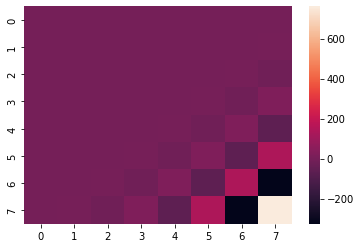

In [282]:
ax = sns.heatmap(A.T@A, linewidth=0)
plt.show()

## Visualize basis functions $g_i(x)$
(Zoom in in the second plot).

In the second plot below it can be seen that the higher the order the "closer" the basis functions get. This can lead to linear dependencies in the basis for high polynomial orders $N$. With rund off errors let's suppose from a given order $p$ up we can asume that the approximation order will be capped, since linear dependent basis do not increase the approximation quality. This might furthermore lead to numerical instabilities.

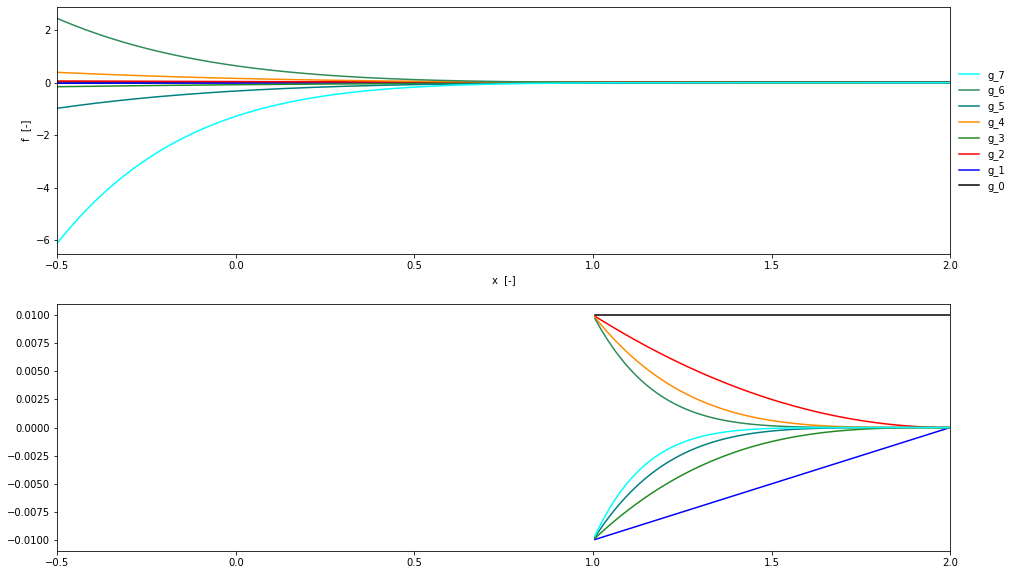

In [291]:
colors=['k','b','r','forestgreen','darkorange','teal','seagreen','cyan']
fig, ax=plt.subplots(2, 1, figsize=(16,10))
for i in range(n+1):
  ax[0].plot(x, A[:,i], colors[i], label='g_'+str(i))
  ax[1].plot(x[180::], A[180::,i], colors[i], label='g_'+str(i))
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set(xlabel='x  [-]', ylabel='f  [-]')
ax[0].set_xlim([-0.5, 2])
ax[1].set_xlim([-0.5, 2])
plt.show()

Here we check if the resulting matrix is orthonormal by plotting $\mathbf{A}^T \cdot \mathbf{A}$ 

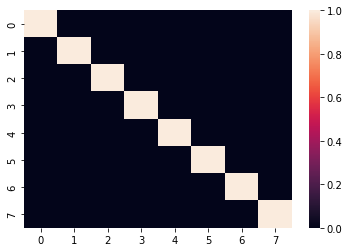

In [293]:
x=grid_gen()
n=7
A=np.zeros((x.shape[0],n+1))
for i in range(n+1):
  A[:,i]=basis_fun(x,i)
A=gram_schmidt(A)

ax = sns.heatmap(A.T@A, linewidth=0)
plt.show()

## Plot polynomials
The resulting polynomials from the orthonormal basis correspond to the Legendre polynomials. By the previously plotted matrix pattern it is also clear the the orthogonality properties of the legendre polynomials are preserved.

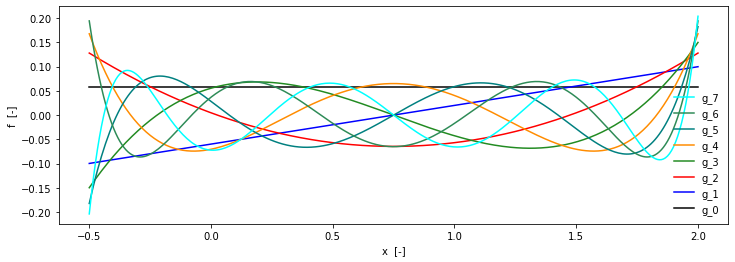

In [295]:
colors=['k','b','r','forestgreen','darkorange','teal','seagreen','cyan']
fig, ax=plt.subplots(1, figsize=(12,4))
for i in range(n+1):
  ax.plot(x, A[:,i], colors[i], label='g_'+str(i))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)
ax.set(xlabel='x  [-]', ylabel='f  [-]')
plt.show()

## Increasing polynomial orders
By increasing the polynomial orders we observe that above a given order the results are only slightly changed and that the resulting polynomials do no correspond with the theoretical results (it can be deduced from the number of solutions to $p(x)=0$. Polynomials of an odd order higher than $9$ all are relatively close to the 9th order polynomials. Polynomials with even order larger then $9$ are all close to the 10th order polynomial. This can be explained by the loss of orthogonality by the Gram-Schmidt algorithm for generated basis that are almost linearly dependent (due to machine accuracy and round off error for polynomials of very high order).

The loss of orthogonality is illustrated in the heatmap of $\mathbf{A}^T \cdot \mathbf{A}$ below. The numerical instabilities occur at order $8$ and higher.

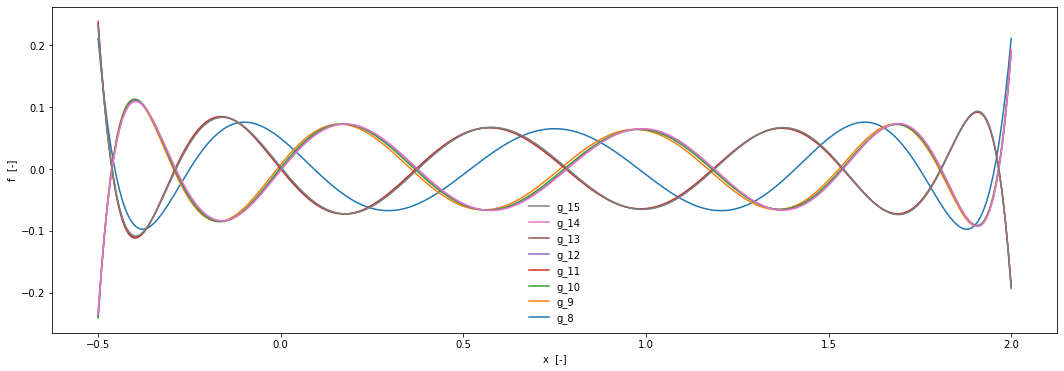

In [296]:
x=grid_gen()
n=15

A=np.zeros((x.shape[0],n+1))

for i in range(n+1):
  A[:,i]=basis_fun(x,i)
A=gram_schmidt(A)

fig, ax=plt.subplots(1, figsize=(18,6))
for i in range(8,n+1):
  ax.plot(x, A[:,i], label='g_'+str(i))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)
#plt.yscale("log")
ax.set(xlabel='x  [-]', ylabel='f  [-]')
plt.show()

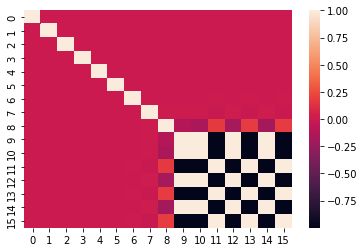

In [297]:
M=np.dot(A.T,A)
ax = sns.heatmap(M, linewidth=0)
plt.show()

## Implement a modified Gram-Schmidt Algorithm to imrpove numerical stability
By implementing a modified Gram Schmidt Algorithm the stability has been increased.

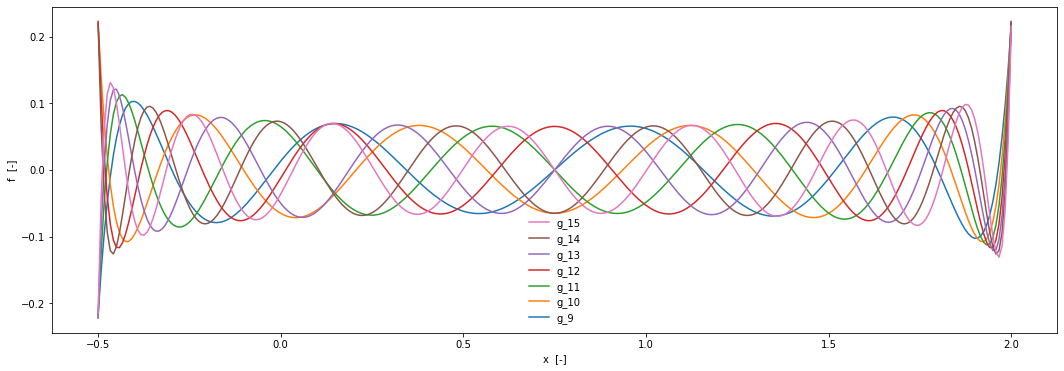

In [299]:
x=grid_gen()
n=15

A=np.zeros((x.shape[0],n+1))

for i in range(n+1):
  A[:,i]=basis_fun(x,i)

A=modifiedGramSchmidt(A)

fig, ax=plt.subplots(1, figsize=(18,6))
for i in range(9,n+1):
  ax.plot(x, A[:,i], label='g_'+str(i))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)
#plt.yscale("log")
ax.set(xlabel='x  [-]', ylabel='f  [-]')
plt.show()

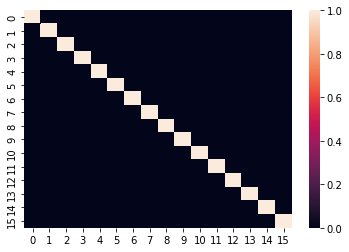

In [300]:
M=np.dot(A.T,A)
ax = sns.heatmap(M, linewidth=0)
plt.show()

## Condition number and orthogonality
The Gram-Schmidt method is known to be sensitive to round off error and tends to be numerically unstable. For high order Legendre polynomials a significant loss of orthogonality is obeserved.
For Legendre polynomials of significantly high order the columns/rows of $\mathbf{M}$ are almost linearly dependent and the condition number of $\mathbf{M}$ becomes very large. This might pose a problem for high order DGSEM, since the problem is transformed to a linear system. The corresponding condition number of the linear system is determined by the condition number of the Mass and Stiffness matrices. Therefore it is important to have well conditioned Mass matrices to avoid numerical errors. 

In [301]:
x=grid_gen()
nmin=2
nmax=20
cond_A=np.zeros((nmax-nmin+1,1))
cond_M=np.zeros((nmax-nmin+1,1))
cond_Mmod=np.zeros((nmax-nmin+1,1))
loss_ortho=np.zeros((nmax-nmin+1,1))
loss_ortho_mod=np.zeros((nmax-nmin+1,1))
for n in range(nmin,nmax+1):
  A=np.zeros((x.shape[0],n+1))
  for i in range(n+1):
    A[:,i]=basis_fun(x,i)
  cond_A[n-nmin]=np.linalg.cond(A.T@A)
  A_gs=gram_schmidt(A)
  cond_M[n-nmin]=np.linalg.cond(A_gs.T@A_gs)
  A_mod=modifiedGramSchmidt(A)
  cond_Mmod[n-nmin]=np.linalg.cond(A_mod.T@A)
  loss_ortho[n-nmin]=np.linalg.norm(np.eye(A_gs.shape[1])-np.dot(A_gs.T,A_gs),ord=2 )
  loss_ortho_mod[n-nmin]=np.linalg.norm(np.eye(A_mod.shape[1])-np.dot(A_mod.T,A_mod),ord=2 )

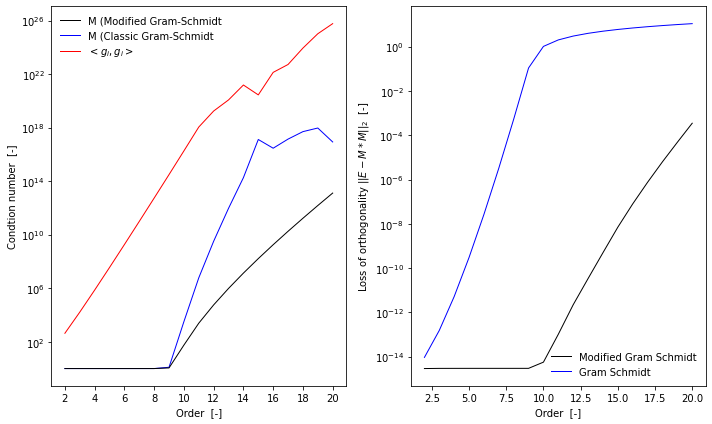

In [302]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].plot(np.linspace(nmin,nmax,nmax-nmin+1), cond_A, 'r', linewidth=1, label='$<g_i,g_i>$')
ax[0].plot(np.linspace(nmin,nmax,nmax-nmin+1), cond_M, 'b', linewidth=1, label='M (Classic Gram-Schmidt' )
ax[0].plot(np.linspace(nmin,nmax,nmax-nmin+1), cond_Mmod, 'k', linewidth=1, label='M (Modified Gram-Schmidt' )
ax[0].set_yscale("log")
ax[0].set(xlabel='Order  [-]', ylabel='Condtion number  [-]')
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], frameon=False)
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))

ax[1].plot(np.linspace(nmin,nmax,nmax-nmin+1), loss_ortho, 'b', linewidth=1, label='Gram Schmidt' )
ax[1].plot(np.linspace(nmin,nmax,nmax-nmin+1), loss_ortho_mod, 'k', linewidth=1, label='Modified Gram Schmidt' )
ax[1].set(xlabel='Order  [-]', ylabel='Loss of orthogonality $||E-M*M||_2$  [-]')
ax[1].set_yscale("log")
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], frameon=False)
plt.tight_layout()
plt.show();